In [1]:
!pip install imbalanced-learn==0.8.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 57.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 35.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.20.1
    Uninstalling scikit-learn-0.20.1:
      Successfully uninstalled scikit-learn-0.20.1


In [2]:
## Import packages here
import pandas as pd
import numpy as np 
import imblearn
from matplotlib.pyplot import figure
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, plot_confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from collections import Counter

In [3]:
churn_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML201EN-SkillsNetwork/labs/module_4/datasets/im_churn.csv", index_col=False)

In [4]:
churn_df.head()

,tenure,MonthlyCharges,TotalCharges,Partner_0,Partner_1,Dependents_0,Dependents_1,PhoneService_0,PhoneService_1,MultipleLines_0,...,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,Class
0,27,70.55,1943.90,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
1,69,93.30,6398.05,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0
2,55,59.20,3175.85,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0
3,49,59.60,2970.30,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
4,72,109.55,7887.25,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0


In [30]:
churn_df.describe()

,tenure,MonthlyCharges,TotalCharges,Partner_0,Partner_1,Dependents_0,Dependents_1,PhoneService_0,PhoneService_1,MultipleLines_0,...,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,Class
count,6174.000000,6174.000000,6174.000000,6174.000000,6174.000000,6174.000000,6174.000000,6174.000000,6174.000000,6174.000000,...,6174.000000,6174.000000,6174.000000,6174.000000,6174.000000,6174.000000,6174.000000,6174.000000,6174.000000,6174.000000
mean,34.400551,63.414440,2385.697668,0.503401,0.496599,0.680920,0.319080,0.098316,0.901684,0.098316,...,0.503887,0.226595,0.269517,0.570619,0.429381,0.300615,0.238257,0.230969,0.230159,0.161970
std,24.498675,30.564605,2292.243923,0.500029,0.500029,0.466158,0.466158,0.297765,0.297765,0.297765,...,0.500025,0.418663,0.443745,0.495028,0.495028,0.458563,0.426052,0.421486,0.420968,0.368453
min,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,29.112500,467.237500,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.000000,69.275000,1498.450000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,58.000000,89.550000,3981.675000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
feature_cols = list(churn_df.iloc[:, :-1].columns)
feature_cols

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'Partner_0',
 'Partner_1',
 'Dependents_0',
 'Dependents_1',
 'PhoneService_0',
 'PhoneService_1',
 'MultipleLines_0',
 'MultipleLines_1',
 'MultipleLines_2',
 'InternetService_0',
 'InternetService_1',
 'InternetService_2',
 'OnlineSecurity_0',
 'OnlineSecurity_1',
 'OnlineSecurity_2',
 'OnlineBackup_0',
 'OnlineBackup_1',
 'OnlineBackup_2',
 'DeviceProtection_0',
 'DeviceProtection_1',
 'DeviceProtection_2',
 'TechSupport_0',
 'TechSupport_1',
 'TechSupport_2',
 'StreamingTV_0',
 'StreamingTV_1',
 'StreamingTV_2',
 'StreamingMovies_0',
 'StreamingMovies_1',
 'StreamingMovies_2',
 'Contract_0',
 'Contract_1',
 'Contract_2',
 'PaperlessBilling_0',
 'PaperlessBilling_1',
 'PaymentMethod_0',
 'PaymentMethod_1',
 'PaymentMethod_2',
 'PaymentMethod_3']

In [33]:
churn_df.dtypes

tenure                  int64
MonthlyCharges        float64
TotalCharges          float64
Partner_0             float64
Partner_1             float64
Dependents_0          float64
Dependents_1          float64
PhoneService_0        float64
PhoneService_1        float64
MultipleLines_0       float64
MultipleLines_1       float64
MultipleLines_2       float64
InternetService_0     float64
InternetService_1     float64
InternetService_2     float64
OnlineSecurity_0      float64
OnlineSecurity_1      float64
OnlineSecurity_2      float64
OnlineBackup_0        float64
OnlineBackup_1        float64
OnlineBackup_2        float64
DeviceProtection_0    float64
DeviceProtection_1    float64
DeviceProtection_2    float64
TechSupport_0         float64
TechSupport_1         float64
TechSupport_2         float64
StreamingTV_0         float64
StreamingTV_1         float64
StreamingTV_2         float64
StreamingMovies_0     float64
StreamingMovies_1     float64
StreamingMovies_2     float64
Contract_0

In [8]:
rs = 123
def split_data(df):
    X = df.loc[ : , df.columns != 'Class']
    y = df['Class'].astype('int')
    return train_test_split(X, y, test_size=0.2, stratify=y, random_state = rs)

In [9]:
X_train, X_test, y_train, y_test = split_data(churn_df)

In [10]:
rs = 123
# Build a logistic regression model
def build_lr(X_train, y_train, X_test, threshold=0.5, best_params=None):
    
    model = LogisticRegression(random_state=rs, 
                              max_iter = 1000)
    # If best parameters are provided
    if best_params:
        model = LogisticRegression(penalty = 'l2',
                              random_state=rs, 
                              max_iter = 1000,
                              class_weight=best_params['class_weight'])
    # Train the model
    model.fit(X_train, y_train)
    # If predicted probability is largr than threshold (default value is 0.5), generate a positive label
    predicted_proba = model.predict_proba(X_test)
    yp = (predicted_proba [:,1] >= threshold).astype('int')
    return yp, model

In [11]:
rs = 123
def evaluate(yt, yp, eval_type="Original"):
    results_pos = {}
    results_pos['type'] = eval_type
    # Accuracy
    results_pos['accuracy'] = accuracy_score(yt, yp)
    # Precision, recall, Fscore
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, beta=5, pos_label=1, average='binary')
    results_pos['recall'] = recall
    # AUC
    results_pos['auc'] = roc_auc_score(yt, yp)
    # Precision
    results_pos['precision'] = precision
    # Fscore
    results_pos['fscore'] = f_beta
    return results_pos

In [27]:
def visualize_eval_metrics(results):
    df = pd.DataFrame(data=results)
    #table = pd.pivot_table(df, values='type', index=['accuracy', 'precision', 'recall', 'f1', 'auc'],
    #                columns=['type'])
    #df = df.set_index('type').transpose()
    print(df)
    x = np.arange(5)
    original = df.iloc[0, 1:].values
    #class_weight = df.iloc[1, 1:].values
    #smote = df.iloc[2, 1:].values
    #under = df.iloc[3, 1:].values
    width = 0.2
    figure(figsize=(12, 10), dpi=80)
    plt.bar(x-0.2, original, width, color='#95a5a6')
    #plt.bar(x, class_weight, width, color='#d35400')
    #plt.bar(x+0.2, smote, width, color='#2980b9')
   # plt.bar(x+0.4, under, width, color='#3498db')
    plt.xticks(x, ['Accuracy', 'Recall', 'AUC', 'Precision', 'Fscore'])
    plt.xlabel("Evaluation Metrics")
    plt.ylabel("Score")
    plt.legend(["Original", "Class Weight", "SMOTE", "Undersampling"])
    plt.show()

In [48]:
results = []
preds, model = build_lr(X_train, y_train, X_test)
result = evaluate(y_test, preds)
results.append(result)

       type  accuracy  recall       auc  precision   fscore
0  Original  0.853441    0.29  0.626159   0.597938  0.29586


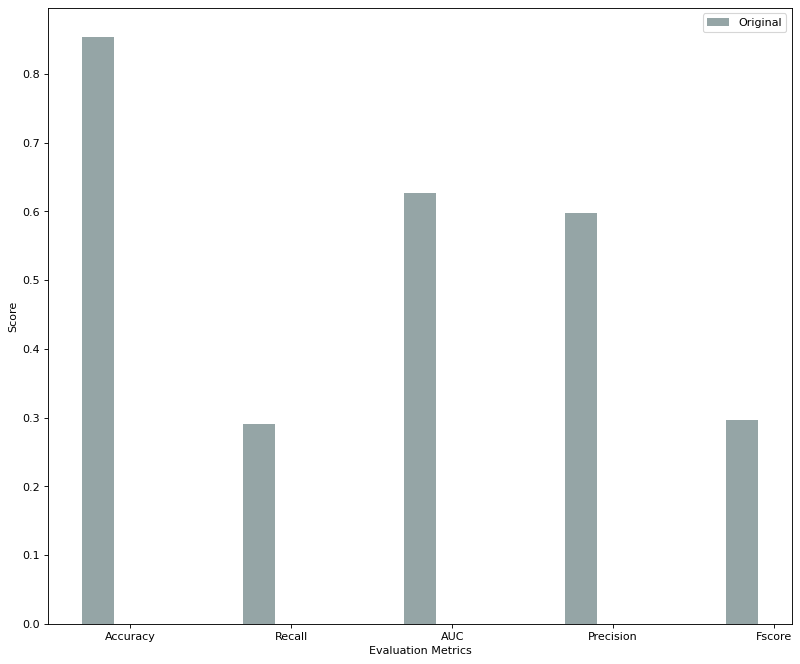

In [29]:
visualize_eval_metrics(results)

<AxesSubplot:>

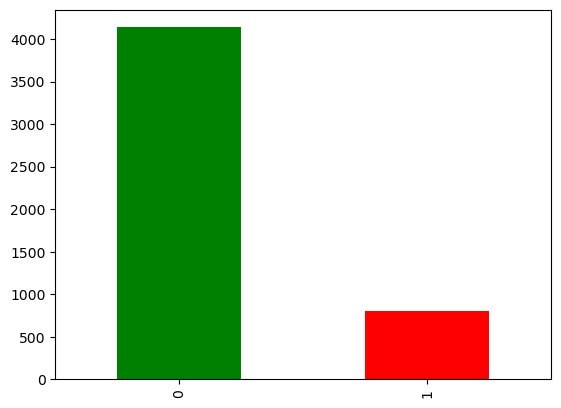

In [36]:
y_train.value_counts().plot.bar(color=['green', 'red'])

In [37]:
def build_rf(X_train, y_train, X_test, threshold=0.5, best_params=None):
    
    model = RandomForestClassifier(random_state = rs)
    # If best parameters are provided
    if best_params:
        model = RandomForestClassifier(random_state = rs,
                                   # If bootstrap sampling is used
                                   bootstrap = best_params['bootstrap'],
                                   # Max depth of each tree
                                   max_depth = best_params['max_depth'],
                                   # Class weight parameters
                                   class_weight=best_params['class_weight'],
                                   # Number of trees
                                   n_estimators=best_params['n_estimators'],
                                   # Minimal samples to split
                                   min_samples_split=best_params['min_samples_split'])
    # Train the model   
    model.fit(X_train, y_train)
    # If predicted probability is largr than threshold (default value is 0.5), generate a positive label
    predicted_proba = model.predict_proba(X_test)
    yp = (predicted_proba [:,1] >= threshold).astype('int')
    return yp, model

In [43]:
# Tuned random forest parameters
best_params_weight = {'bootstrap': True,
                         'class_weight': class_weight, 
                         'max_depth': 10, 
                         'min_samples_split': 5, 
                         'n_estimators': 50}

In [44]:
class_weight = {}
# 0.2 to Non-churn class
class_weight[0] = 0.2
# 0.8 to Churn class
class_weight[1] = 0.8

In [45]:
results = []

In [49]:
preds_cw, weight_model = build_rf(X_train, y_train, X_test, best_params=best_params_weight)
result = evaluate(y_test, preds_cw, "Class Weight")
print(result)
results.append(result)

{'type': 'Class Weight', 'accuracy': 0.8137651821862348, 'recall': 0.62, 'auc': 0.7356038647342995, 'precision': 0.4460431654676259, 'fscore': 0.6108374384236454}


In [52]:
def visualize_eval_metrics(results):
    df = pd.DataFrame(data=results)
    #table = pd.pivot_table(df, values='type', index=['accuracy', 'precision', 'recall', 'f1', 'auc'],
    #                columns=['type'])
    #df = df.set_index('type').transpose()
    print(df)
    x = np.arange(5)
    original = df.iloc[0, 1:].values
    class_weight = df.iloc[1, 1:].values
    #smote = df.iloc[2, 1:].values
    #under = df.iloc[3, 1:].values
    width = 0.2
    figure(figsize=(12, 10), dpi=80)
    plt.bar(x-0.2, original, width, color='#95a5a6')
    plt.bar(x, class_weight, width, color='#d35400')
    #plt.bar(x+0.2, smote, width, color='#2980b9')
   # plt.bar(x+0.4, under, width, color='#3498db')
    plt.xticks(x, ['Accuracy', 'Recall', 'AUC', 'Precision', 'Fscore'])
    plt.xlabel("Evaluation Metrics")
    plt.ylabel("Score")
    plt.legend(["Original", "Class Weight", "SMOTE", "Undersampling"])
    plt.show()

           type  accuracy  recall       auc  precision    fscore
0      Original  0.853441    0.29  0.626159   0.597938  0.295860
1  Class Weight  0.813765    0.62  0.735604   0.446043  0.610837


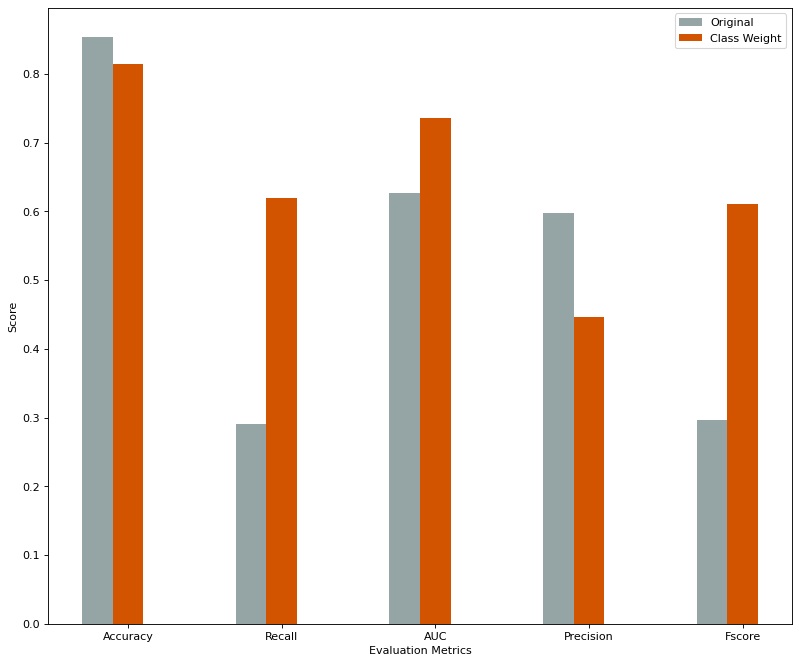

In [53]:
visualize_eval_metrics(results)

In [58]:
def resample(X_train, y_train):
    # SMOTE sampler (Oversampling)
    # Undersampling
    under_sampler = RandomUnderSampler(random_state=123)
    # Resampled datasets
    X_under, y_under = under_sampler.fit_resample(X_train, y_train)
    return X_under, y_under

In [59]:
X_under, y_under = resample(X_train, y_train)

In [60]:
preds_under, under_model = build_rf(X_under, y_under, X_test, best_params=best_params_no_weight)
result = evaluate(y_test, preds_under, "Undersampling")
print(result)
results.append(result)

{'type': 'Undersampling', 'accuracy': 0.7336032388663968, 'recall': 0.79, 'auc': 0.7563526570048309, 'precision': 0.3550561797752809, 'fscore': 0.7544536271809001}


In [67]:
def visualize_eval_metrics(results):
    df = pd.DataFrame(data=results)
    #table = pd.pivot_table(df, values='type', index=['accuracy', 'precision', 'recall', 'f1', 'auc'],
    #                columns=['type'])
    #df = df.set_index('type').transpose()
    print(df)
    x = np.arange(5)
    original = df.iloc[0, 1:].values
    class_weight = df.iloc[1, 1:].values
    #smote = df.iloc[2, 1:].values
    under = df.iloc[2, 1:].values
    width = 0.2
    figure(figsize=(12, 10), dpi=80)
    plt.bar(x-0.2, original, width, color='#95a5a6')
    plt.bar(x, class_weight, width, color='#d35400')
    #plt.bar(x+0.2, smote, width, color='#2980b9')
    plt.bar(x+0.2, under, width, color='#3498db')
    plt.xticks(x, ['Accuracy', 'Recall', 'AUC', 'Precision', 'Fscore'])
    plt.xlabel("Evaluation Metrics")
    plt.ylabel("Score")
    plt.legend(["Original", "Class Weight", "Undersampling"])
    plt.show()

            type  accuracy  recall       auc  precision    fscore
0       Original  0.853441    0.29  0.626159   0.597938  0.295860
1   Class Weight  0.813765    0.62  0.735604   0.446043  0.610837
2  Undersampling  0.733603    0.79  0.756353   0.355056  0.754454


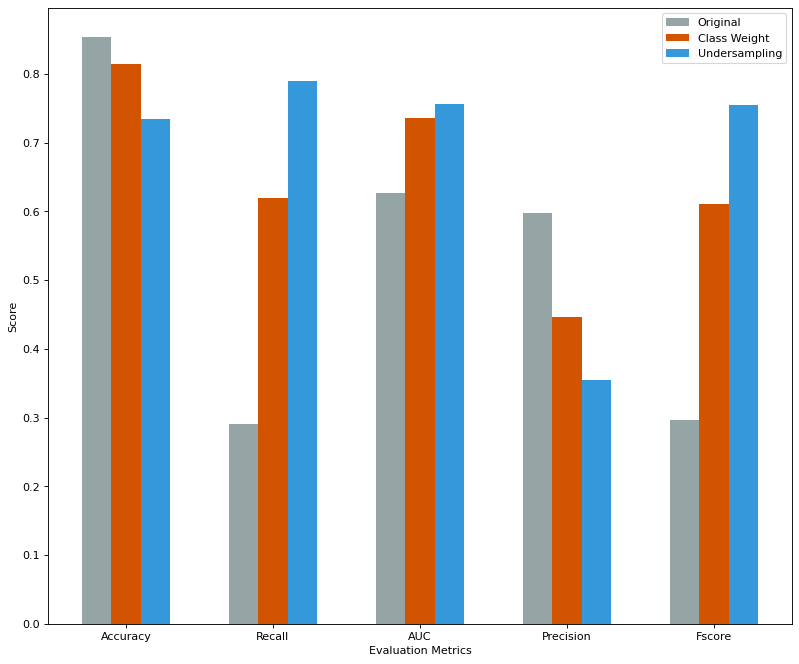

In [68]:
visualize_eval_metrics(results)